
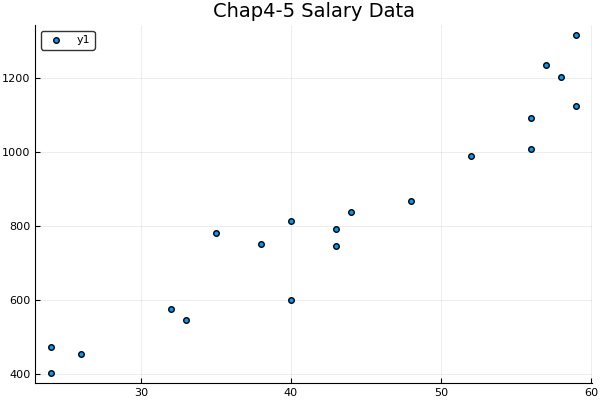

In [1]:
using Plots
using Distributions
pyplot()

# アヒル本4章のデータ
x=Real[ 24, 24, 26, 32, 33, 35, 38, 40, 40, 43, 43, 44, 48, 52,  56,  56,  57,  58,  59,  59]
y=Real[472,403,454,575,546,781,750,601,814,792,745,837,868,988,1092,1007,1233,1202,1123,1314]

# Plot
plot(x,y,seriestype=:scatter,title="Chap4-5 Salary Data")

In [10]:
function likelihood(a, b, sigma)
    y_pred = a + b*x
    likehoods = [logpdf(Normal(aa, sigma), bb) for (aa,bb) in zip(y_pred,y)]
    #likehoods = (-0.5*log(2*pi)*ones(y)-log(sigma)*ones(y)-(y-y_pred).*(y-y_pred)/(2*sigma^2))
    l_sum = sum(likehoods)
    return l_sum
end

function dlikelihood(a, b, sigma)
    y_pred = a + b*x
    
    grad_a    = sum(y - y_pred)/sigma^2
    grad_b    = dot(x, y - y_pred)/sigma^2
    grad_sigma= -1./sigma + dot(y - y_pred,y - y_pred)/sigma^3
    return [grad_a, grad_b, grad_sigma]
end

function prior(a, b, sigma)
    a_prior     = logpdf(Normal(0, 100),a)
    b_prior     = logpdf(Normal(0, 100),b)
    sigma_prior = logpdf(Uniform(0,Inf),sigma)    
    return a_prior + b_prior + sigma_prior
end

function posterior(a, b, sigma)
    return(likehood(a, b, sigma) + prior(a, b, sigma))
end

function Leapfrog(theta, r, epsilon, mass)
    r += 0.5 * epsilon * dlikehood(theta[1], theta[2], theta[3])
    theta +=   epsilon * r ./ mass
    r += 0.5 * epsilon * dlikehood(theta[1], theta[2], theta[3])
    return theta, r
end

function Hamiltonian(theta, r)
    return -likelihood(theta[1], theta[2], theta[3]) + (0.5 * dot(r,r))
end

Hamiltonian (generic function with 1 method)

In [3]:
#HMC法
# a, b, sigmaの初期値; Chain 1つ分
Init = Real[1, 1, 10] 
push!(Init, Hamiltonian(Init,[0,0,0]))
Iteration = 5000
BurnIn    = 1000
chain = Array[Init]

T = 30
epsilon = 0.01
M = Real[0.001, 1.0, 1.0]

for i in 1:Iteration
    r = [rand(Normal(0, y)) for (x, y) in zip(1:3, M)]
    
    proposal_draw = chain[i][1:3]
    proposal_r    = r
        
    for t in 1:T
        proposal_draw, proposal_r = Leapfrog(proposal_draw, proposal_r, epsilon, M)
    end
    
    tmp1  = Hamiltonian(proposal_draw, proposal_r)
    tmp2  = Hamiltonian(chain[i], r)
    alpha = min(1,exp(-tmp1+tmp2))
    
    u = rand(Uniform(0,1))
    if mod(i, 100)==1
        println((i, proposal_draw, alpha, Hamiltonian(proposal_draw,[0,0,0]),
                dlikehood(proposal_draw[1],proposal_draw[2],proposal_draw[3])))
    end
    if u < alpha
        push!(proposal_draw, Hamiltonian(proposal_draw,[0,0,0]))
        push!(chain, proposal_draw)
    else
        push!(chain, chain[i])
    end
end

# BurnInは除外
chain = chain[BurnIn+1:end]

# 結果の取り出し
a = [chain[i][1] for i in 1:length(chain)]
b = [chain[i][2] for i in 1:length(chain)]
sigma = [chain[i][3] for i in 1:length(chain)]

println("MCMC complete")

(1, [1042.59, 50.7251, 91.399], 1.0, 7212.696352296137, [-5.77385, -259.662, 155.44])
(101, [149.195, 14.8082, 107.129], 1.0, 124.02702860604074, [0.0674726, 4.60334, 0.217825])
(201, [149.826, 16.1811, 105.36], 1.0, 121.0174248071786, [-0.0386072, -0.274123, 0.170671])
(301, [94.8574, 17.6088, 105.709], 1.0, 119.59197495281825, [-0.0507374, -1.156, 0.141888])
(401, [33.5984, 18.9971, 102.071], 1.0, 118.11186764060075, [-0.0523533, -1.51207, 0.131665])
(501, [3.10941, 18.9186, 98.0821], 1.0, 117.2514293163146, [0.0137637, 1.43913, 0.135735])
(601, [-21.2014, 19.7293, 97.4853], 1.0, 116.5922934434865, [-0.00886644, 0.236884, 0.125547])
(701, [-19.9539, 19.4643, 98.1258], 1.0, 116.8288248065193, [0.0125198, 1.23061, 0.126879])
(801, [-44.261, 19.6768, 97.7027], 1.0, 117.08900124917878, [0.0442521, 2.55173, 0.134523])
(901, [-23.1913, 20.2769, 99.3051], 0.9763082246585691, 117.10066883872655, [-0.05265, -1.83442, 0.126035])
(1001, [-19.7716, 19.8685, 99.4972], 1.0, 116.77533526532, [-0.02

In [11]:
mean(a),mean(b),mean(sigma)

(-138.85083936253207, 22.353694699642205, 111.0379391864323)

In [12]:
plot(a)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1000 
 
 
 2000 
 
 
 3000 
 
 
 4000 
 
 
 -250 
 
 
 -200 
 
 
 -150 
 
 
 -100 
 
 
 -50 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip2602)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 211.063,307.604 211.197,307.9

In [6]:
h = [chain[i][4] for i in 1:length(chain)]
plot(h,ylims=(100,150))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1000 
 
 
 2000 
 
 
 3000 
 
 
 4000 
 
 
 100 
 
 
 110 
 
 
 120 
 
 
 130 
 
 
 140 
 
 
 150 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip1602)" style="stroke:#009af9; stroke-width:1

In [7]:
xlist = collect(65:85)
ylist = collect(-140:-110)
sigmalist=[Hamiltonian([y,22,x], [0,0,0]) for x in xlist, y in ylist]
plot(ylist,xlist,sigmalist)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -140 
 
 
 -130 
 
 
 -120 
 
 
 -110 
 
 
 65 
 
 
 70 
 
 
 75 
 
 
 80 
 
 
 85 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip1802)" style="stroke:#9e2a62; stroke-width:1; stroke-opacity:1; fill:none" points="
 272.571,375.813 258.242,374.516 241.862,372.15 225.482,368.92 209.103,364.855 192.723,359.99 185.84,357.613 176.344,353.858 159.964,346.542 145.506,339.413 
 143.584,338.323 127.205,328.14 116.824,321.213 110.825,316.579 94.4456,303.133 94.3078,303.013 78.0661,286.51 76.4728,284.813 62.0054,266.613 61.6865,266.126 
 50.5643,248.413 45.3069,238.031 41.497,230.212 34.7528,212.012 30.0243,193.812 28.9273,186.259 
 "/>
 
 
 
<polyline clip-path="url(#clip1802)" style="stroke:#821f6b; stroke-width:1; stroke-opacity:1; fill:none" points="
 156.211,11.811 143.584,18.9282 127.205,29.4673 126.45,30.0111 110.825,42.5635 104.551,48.2113 94.4456,58.6025 87.6196,66.4114 78.0661,79.3319 74.5359,84.6115 
 64.6892,102.812 61.6865,110.147 57.6457,121.012 53.1153,139.212 50.8643,157.412 50.8639,175.612 53.085,193.812 57.4978,212.012 61.6865,223.493 64.2473,230.212 
 73.591,248.413 78.0661,255.315 85.7523,266.613 94.4456,277.098 101.198,284.813 110.825,294.026 120.808,303.013 127.205,307.91 143.584,319.579 146.089,321.213 
 159.964,328.973 176.344,337.291 181.071,339.413 192.723,343.931 209.103,349.418 225.482,354.01 241.64,357.613 241.862,357.656 258.242,359.966 274.621,361.413 
 291.001,361.985 307.38,361.677 323.76,360.491 340.139,358.439 344.782,357.613 356.519,355.206 372.899,350.892 389.278,345.669 405.658,339.585 406.06,339.413 
 422.037,331.559 438.417,322.657 440.83,321.213 454.797,311.491 466.127,303.013 471.176,298.563 485.821,284.813 487.556,282.864 501.235,266.613 503.935,262.693 
 513.296,248.413 520.315,234.944 
 "/>
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip1802)" style="stroke:#63146e; stroke-width:1; stroke-opacity:1; fill:none" points="
 356.862,11.811 372.899,16.1725 389.278,21.7226 405.658,28.4156 408.995,30.0111 422.037,36.8873 438.417,46.9191 440.273,48.2113 454.797,59.634 462.395,66.4114 
 471.176,75.5271 478.963,84.6115 487.556,96.7943 491.361,102.812 500.281,121.012 503.935,131.676 506.264,139.212 509.464,157.412 510.183,175.612 508.456,193.812 
 504.314,212.012 503.935,213.043 497.293,230.212 487.703,248.413 487.556,248.628 474.558,266.613 471.176,270.413 457.515,284.813 454.797,287.194 438.417,300.481 
 435.008,303.013 422.037,311.12 405.658,320.387 403.994,321.213 389.278,327.431 372.899,333.378 356.519,338.3 351.756,339.413 340.139,341.738 323.76,344.055 
 307.38,345.394 291.001,345.742 274.621,345.096 258.242,343.462 241.862,340.855 235.239,339.413 225.482,336.935 209.103,331.699 192.723,325.455 183.105,321.213 
 176.344,317.711 159.964,308.153 151.988,303.013 143.584,296.586 129.381,284.813 127.205,282.633 112.296,266.613 110.825,264.655 99.3513,248.413 94.4456,239.505 
 89.6007,230.212 82.7161,212.012 78.345,193.812 78.0661,190.964 76.6352,175.612 77.3393,157.412 78.0661,153.1 80.6579,139.212 86.6838,121.012 94.4456,104.747 
 95.4738,102.812 107.879,84.6115 110.825,81.0567 124.435,66.4114 127.205,63.8547 143.584,50.4438 146.69,48.2113 159.964,39.7438 176.344,30.7131 177.827,30.0111 
 192.723,23.608 209.103,17.7205 225.482,12.9419 230.459,11.811 
 "/>
<polyline clip-path="url(#clip1802)" style="stroke:#470b69; stroke-width:1; stroke-opacity:1; fill:none" points="
 207.489,48.2113 192.723,54.8634 176.344,63.7302 172.104,66.4114 159.964,75.2189 148.792,84.6115 143.584,89.8209 132.229,102.812 127.205,110.047 120.476,121.012 
 112.393,139.212 110.825,144.906 107.758,157.412 106.108,175.612 107.274,193.812 110.825,210.159 111.254,212.012 118.565,230.212 127.205,245.461 129,248.413 
 143.545,266.613 143.584,266.652 159.964,281.666 163.737,284.813 176.344,293.413 192.071,303.013 192.723,303.345 209.103,310.528 225.482,316.567 241.266,321.213 
 241.862,321.361 258.242,324.329 274.621,326.1

In [8]:
xlist = collect(10:30)
ylist = collect(-190:10:10)
sigmalist=[Hamiltonian([y,x,70], [0,0,0]) for x in xlist, y in ylist]
plot(ylist,xlist,sigmalist)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -150 
 
 
 -100 
 
 
 -50 
 
 
 0 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 30 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip2002)" style="stroke:#9e2a62; stroke-width:1; stroke-opacity:1; fill:none" points="
 520.315,369.049 495.746,365.21 471.176,361.454 446.607,357.775 445.532,357.613 422.037,353.761 397.468,349.823 372.899,345.974 348.329,342.208 329.827,339.413 
 323.76,338.411 299.191,334.372 274.621,330.429 250.052,326.575 225.482,322.802 215.06,321.213 200.913,318.855 176.344,314.817 151.774,310.872 127.205,307.016 
 102.635,303.241 101.155,303.013 78.0661,299.133 53.4967,295.098 28.9273,291.156 
 "/>
<polyline clip-path="url(#clip2002)" style="stroke:#821f6b; stroke-width:1; stroke-opacity:1; fill:none" points="
 28.9273,277.165 53.4967,281.227 74.6795,284.813 78.0661,285.333 102.635,289.11 127.205,292.976 151.774,296.939 176.344,301.008 188.298,303.013 200.913,304.932 
 225.482,308.707 250.052,312.572 274.621,316.535 299.191,320.605 302.852,321.213 323.76,324.361 348.329,328.129 372.899,331.989 397.468,335.947 418.503,339.413 
 422.037,339.942 446.607,343.615 471.176,347.373 495.746,351.222 520.315,355.17 
 "/>
<polyline clip-path="url(#clip2002)" style="stroke:#63146e; stroke-width:1; stroke-opacity:1; fill:none" points="
 520.315,339.789 517.762,339.413 495.746,335.802 471.176,331.878 446.607,328.062 422.037,324.344 400.907,321.213 397.468,320.644 372.899,316.589 348.329,312.653 
 323.76,308.824 299.191,305.094 285.313,303.013 274.621,301.224 250.052,297.165 225.482,293.223 200.913,289.388 176.344,285.651 170.817,284.813 151.774,281.593 
 127.205,277.536 102.635,273.595 78.0661,269.76 57.4759,266.613 53.4967,265.933 28.9273,261.759 
 "/>
<polyline clip-path="url(#clip2002)" style="stroke:#470b69; stroke-width:1; stroke-opacity:1; fill:none" points="
 28.9273,244.222 53.1954,248.413 53.4967,248.459 78.0661,252.191 102.635,256.035 127.205,260.003 151.774,264.109 166.441,266.613 176.344,268.103 200.913,271.834 
 225.482,275.678 250.052,279.648 274.621,283.758 280.875,284.813 299.191,287.533 323.76,291.255 348.329,295.092 372.899,299.055 396.622,303.013 397.468,303.138 
 422.037,306.74 446.607,310.447 471.176,314.267 495.746,318.215 513.939,321.213 520.315,322.139 
 "/>
<polyline clip-path="url(#clip2002)" style="stroke:#270b52; stroke-width:1; stroke-opacity:1; fill:none" points="
 520.315,301.103 495.746,297.112 471.176,293.282 446.607,289.593 422.037,286.029 413.596,284.813 397.468,282.1 372.899,278.082 348.329,274.226 323.76,270.512 
 299.191,266.923 297.074,266.613 274.621,262.78 250.052,258.752 225.482,254.883 200.913,251.155 182.388,248.413 176.344,247.366 151.774,243.16 127.205,239.134 
 102.635,235.265 78.0661,231.534 69.2821,230.212 53.4967,227.441 28.9273,223.253 
 "/>
<polyline clip-path="url(#clip2002)" style="stroke:#0d0829; stroke-width:1; stroke-opacity:1; fill:none" points="
 28.9273,196.223 53.4967,199.971 78.0661,203.923 102.635,208.118 124.133,212.012 127.205,212.461 151.774,216.042 176.344,219.799 200.913,223.764 225.482,227.981 
 238.031,230.212 250.052,231.928 274.621,235.494 299.191,239.237 323.76,243.193 348.329,247.404 354.114,248.413 372.899,251.028 397.468,254.557 422.037,258.262 
 446.607,262.18 471.176,266.354 472.69,266.613 495.746,269.739 520.315,273.206 
 "/>
<polyline clip-path="url(#clip2002)" style="stroke:#0d0829; stroke-width:1; stroke-opacity:1; fill:none" points="
 520.315,146.703 495.746,142.306 479.292,139.212 471.176,137.989 446.607,134.243 422.037,130.297 397.468,126.11 372.899,121.633 369.533,121.012 348.329,117.887 
 323.76,114.116 299.191,110.137 274.621,105.908 257.476,102.812 250.052,101.733 225.482,98.1364 200.913,94.3607 176.344,90.3712 151.774,86.1242 143.237,84.6115 
 127.205,82.3362 102.635,78.759 78.0661,75.0009 53.4967,71.0263 28.9273,66.79 
 "/>
<polyline clip-path="url(#clip2002)" style="stroke:#270b52; stroke-width:1; stroke-opacity:1; fill:non

In [9]:
xlist = collect(10:30)
ylist = collect(50:100)
sigmalist=[Hamiltonian([-113,x,y], [0,0,0]) for x in xlist, y in ylist]
plot(ylist,xlist,sigmalist)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 50 
 
 
 60 
 
 
 70 
 
 
 80 
 
 
 90 
 
 
 100 
 
 
 10 
 
 
 15 
 
 
 20 
 
 
 25 
 
 
 30 
 
 
 
 
 
 
<polyline clip-path="url(#clip2202)" style="stroke:#ba3655; stroke-width:1; stroke-opacity:1; fill:none" points="
 231.134,375.813 225.482,374.011 215.655,370.883 205.827,367.798 195.999,364.756 186.171,361.757 176.344,358.803 172.402,357.613 166.516,355.724 156.688,352.576 
 146.86,349.477 137.033,346.425 127.205,343.422 117.377,340.466 113.897,339.413 107.549,337.358 97.7216,334.189 87.8938,331.073 78.0661,328.011 68.2383,325.002 
 58.4106,322.046 55.667,321.213 48.5828,318.893 38.755,315.699 28.9273,312.564 
 "/>
<polyline clip-path="url(#clip2202)" style="stroke:#821f6b; stroke-width:1; stroke-opacity:1; fill:none" points="
 28.9273,289.022 38.755,291.584 48.5828,294.194 58.4106,296.852 68.2383,299.558 78.0661,302.312 80.59,303.013 87.8938,304.86 97.7216,307.365 107.549,309.913 
 117.377,312.502 127.205,315.134 137.033,317.807 146.86,320.523 149.38,321.213 156.688,323.057 166.516,325.554 176.344,328.089 186.171,330.66 195.999,333.269 
 205.827,335.916 215.655,338.599 218.654,339.413 225.482,341.134 235.31,343.623 245.138,346.146 254.966,348.702 264.793,351.292 274.621,353.915 284.449,356.572 
 288.315,357.613 294.277,359.115 304.104,361.597 313.932,364.109 323.76,366.651 333.588,369.224 343.415,371.827 353.243,374.46 358.295,375.813 
 "/>
<polyline clip-path="url(#clip2202)" style="stroke:#9e2a62; stroke-width:1; stroke-opacity:1; fill:none" points="
 286.612,375.813 284.449,375.179 274.621,372.274 264.793,369.407 254.966,366.576 245.138,363.782 235.31,361.025 225.482,358.305 223.004,357.613 215.655,355.427 
 205.827,352.523 195.999,349.66 186.171,346.837 176.344,344.055 166.516,341.314 159.662,339.413 156.688,338.527 146.86,335.581 137.033,332.679 127.205,329.822 
 117.377,327.011 107.549,324.245 97.7216,321.525 96.6116,321.213 87.8938,318.564 78.0661,315.615 68.2383,312.718 58.4106,309.872 48.5828,307.077 38.755,304.333 
 34.0346,303.013 28.9273,301.451 
 "/>
<polyline clip-path="url(#clip2202)" style="stroke:#63146e; stroke-width:1; stroke-opacity:1; fill:none" points="
 28.9273,275.28 38.755,277.669 48.5828,280.102 58.4106,282.579 67.1529,284.813 68.2383,285.061 78.0661,287.273 87.8938,289.524 97.7216,291.812 107.549,294.139 
 117.377,296.503 127.205,298.906 137.033,301.346 143.714,303.013 146.86,303.726 156.688,305.937 166.516,308.182 176.344,310.459 186.171,312.77 195.999,315.114 
 205.827,317.49 215.655,319.9 221.007,321.213 225.482,322.221 235.31,324.429 245.138,326.667 254.966,328.934 264.793,331.23 274.621,333.556 284.449,335.911 
 294.277,338.295 298.893,339.413 304.104,340.582 313.932,342.787 323.76,345.017 333.588,347.275 343.415,349.558 353.243,351.867 363.071,354.203 372.899,356.565 
 377.269,357.613 382.726,358.834 392.554,361.034 402.382,363.258 412.21,365.506 422.037,367.777 431.865,370.072 441.693,372.391 451.521,374.733 456.059,375.813 
 
 "/>
<polyline clip-path="url(#clip2202)" style="stroke:#470b69; stroke-width:1; stroke-opacity:1; fill:none" points="
 520.315,359.739 510.487,357.869 509.154,357.613 500.659,355.86 490.832,353.846 481.004,351.85 471.176,349.873 461.348,347.915 451.521,345.976 441.693,344.056 
 431.865,342.155 422.037,340.272 417.559,339.413 412.21,338.301 402.382,336.258 392.554,334.236 382.726,332.235 372.899,330.256 363.071,328.298 353.243,326.36 
 343.415,324.445 333.588,322.55 326.624,321.213 323.76,320.612 313.932,318.536 304.104,316.484 294.277,314.455 284.449,312.451 274.621,310.471 264.793,308.515 
 254.966,306.583 245.138,304.675 236.496,303.013 235.31,302.761 225.482,300.645 215.655,298.557 205.827,296.496 195.999,294.463 186.171,292.458 176.344,290.48 
 166.516,288.53 156.688,286.608 147.392,284.813 146.86,284.697 137.033,282.533 127.205,280.4 117.377,278.3 107.549,276.233 97.7216,274.198 87.8938,272.195 
 78.0661,270.225 68.2383,268.288 59.634

In [10]:
ylist = collect(-190:140)
sigmalist=[Hamiltonian([y,22,70], [0,0,0]) for y in ylist]
plot(ylist,sigmalist)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -150 
 
 
 -100 
 
 
 -50 
 
 
 0 
 
 
 50 
 
 
 100 
 
 
 120 
 
 
 140 
 
 
 160 
 
 
 180 
 
 
 200 
 
 
 220 
 
 
 240 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1


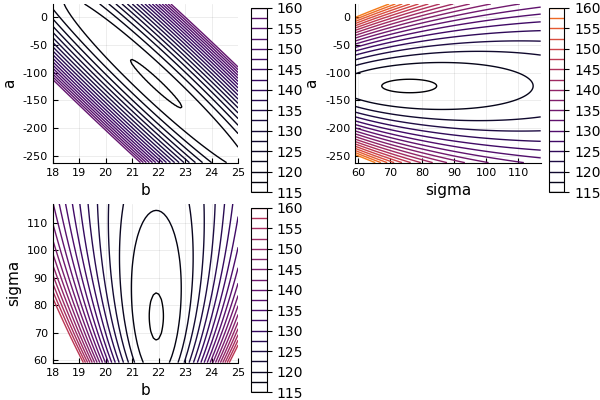

In [8]:
a = -120.0
b = 22.0
sigma = 79.0

a_list = collect(-262:24)
b_list = collect(18:0.1:25)
sigma_list = collect(59:117)

ab_list = [Hamiltonian([tmp_a,tmp_b,sigma], [0,0,0]) for tmp_a in a_list, tmp_b in b_list]
ac_list = [Hamiltonian([tmp_a,b,    tmp_sigma], [0,0,0]) for tmp_a in a_list, tmp_sigma in sigma_list]
cb_list = [Hamiltonian([a, tmp_b,tmp_sigma], [0,0,0]) for tmp_sigma in sigma_list, tmp_b in b_list]

levels = collect(115:2.5:160)

p1 = contour(b_list,a_list,ab_list,levels=levels, xlabel="b", ylabel="a")
p2 = contour(sigma_list,a_list,ac_list, levels=levels, xlabel="sigma", ylabel="a")
p3 = contour(b_list,sigma_list,cb_list, levels=levels, xlabel="b", ylabel="sigma")

plot(p1,p2,p3)


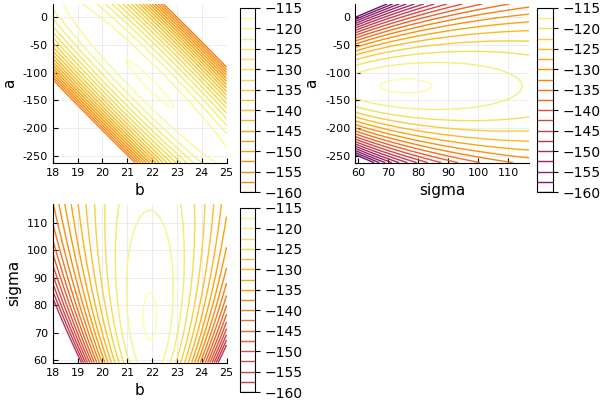

In [11]:
a = -120.0
b = 22.0
sigma = 79.0

a_list = collect(-262:24)
b_list = collect(18:0.1:25)
sigma_list = collect(59:117)

ab_list = [likelihood(tmp_a,tmp_b,sigma) for tmp_a in a_list, tmp_b in b_list]
ac_list = [likelihood(tmp_a,b,    tmp_sigma) for tmp_a in a_list, tmp_sigma in sigma_list]
cb_list = [likelihood(a, tmp_b,tmp_sigma) for tmp_sigma in sigma_list, tmp_b in b_list]

levels = collect(-160:2.5:-115)

p1 = contour(b_list,a_list,ab_list,levels=levels, xlabel="b", ylabel="a")
p2 = contour(sigma_list,a_list,ac_list, levels=levels, xlabel="sigma", ylabel="a")
p3 = contour(b_list,sigma_list,cb_list, levels=levels, xlabel="b", ylabel="sigma")

plot(p1,p2,p3)